# **TSA Final Project Part 2 (G9)**
# STOCK INSIGHT - (Time Series Forecasting with Yahoo Stock Price)
#### Team Members:
- Marina Kanare (The team Lead.)
- Rishi Sanjaykumar Patel
- Rohan Bankala


# **Load Data**

In [2]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np
import time
import os
import random
from google.colab import drive
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scipy.stats import boxcox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid
!pip install pmdarima


from pmdarima import auto_arima


In [3]:
from google.colab import drive
drive.mount("/content/drive")

# List files in the specified directory
directory_path = '/content/drive/MyDrive/TS Project/'
os.listdir(directory_path)

Mounted at /content/drive


['.ipynb_checkpoints', 'yahoo_stock.csv']

# **Convert csv to Data Frame object**

In [4]:
# Load the CSV file using pandas
file_path = '/content/drive/MyDrive/TS Project/yahoo_stock.csv'
stock_insight = 'Yahoo Stock Dataset'

df_stock = pd.read_csv(file_path)

# Display information about the loaded data
print(f"{stock_insight}: shape is {df_stock.shape}")
print(df_stock.info())
display(df_stock.head(5))
print(df_stock.columns)


Yahoo Stock Dataset: shape is (1825, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB
None


,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


The dataset contains the following columns:

- Date: The date of the stock record.
- High: The highest price of the stock on that day.
- Low: The lowest price of the stock on that day.
- Open: The opening price of the stock on that day.
- Close: The closing price of the stock on that day.
- Volume: The number of shares traded on that day.
- Adj Close: The adjusted closing price of the stock on that day.

# **1. Time series decomposition** (10pts)


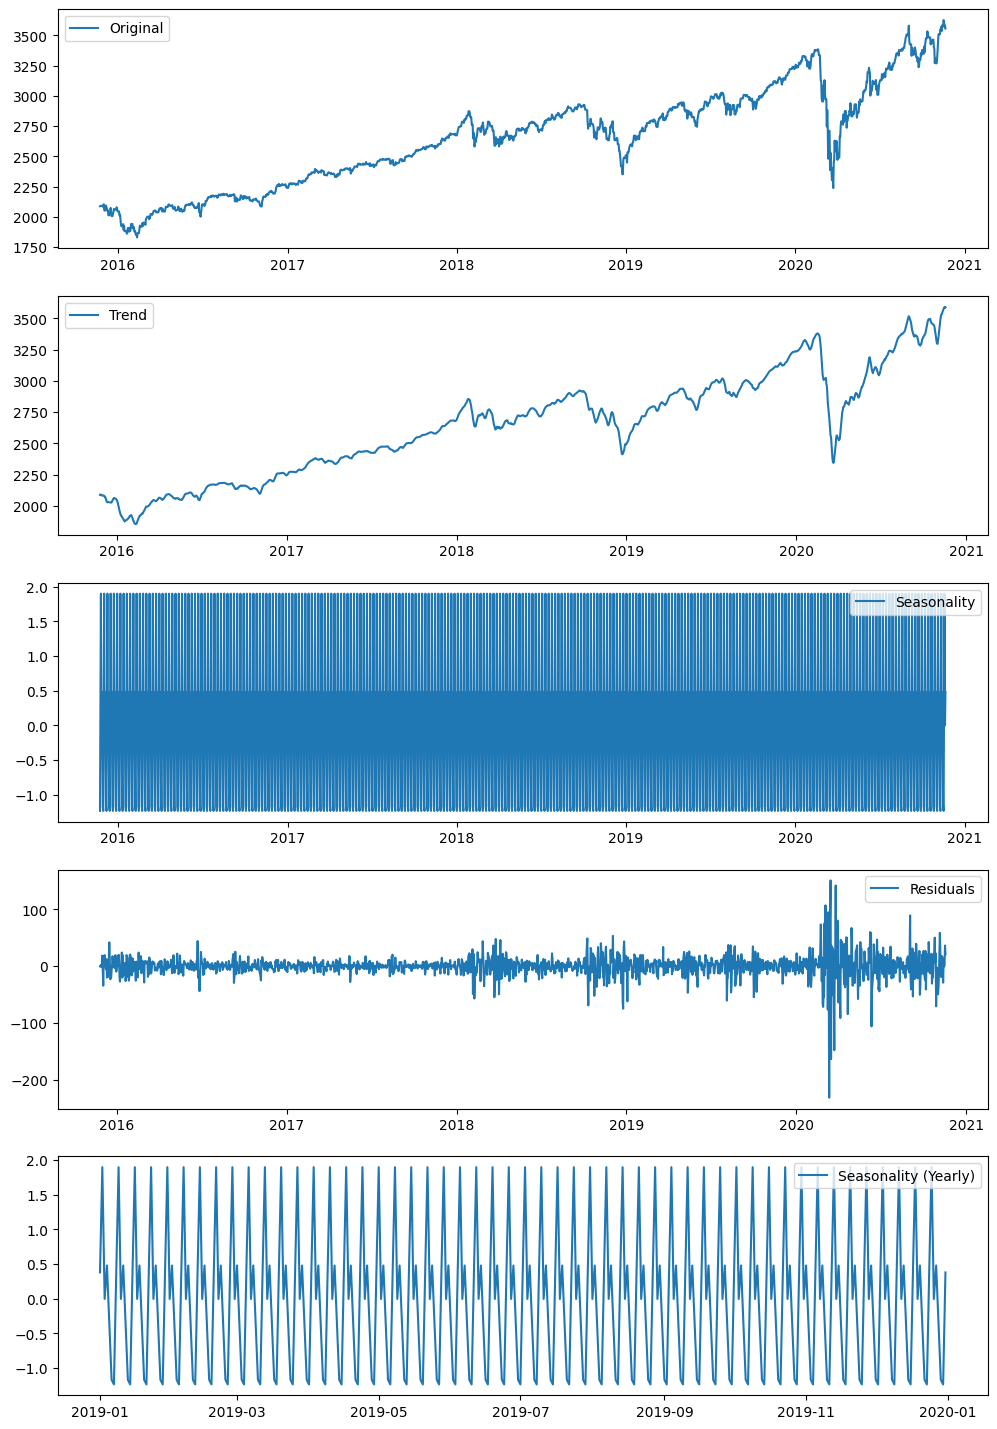

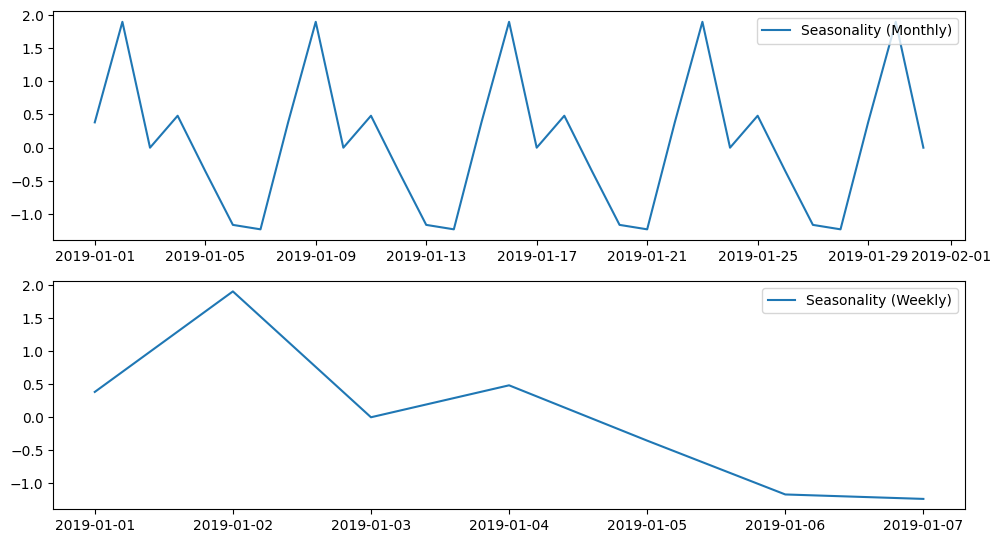

In [5]:
df_stock = pd.read_csv(file_path)
# Convert the date column to datetime type
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

# Set the date column as the index
df_stock = df_stock.set_index('Date')

# Perform time series decomposition
decomposition = seasonal_decompose(df_stock['Adj Close'], model='additive')

# Access the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original time series and its components
plt.figure(figsize=(12, 18))

plt.subplot(511)
plt.plot(df_stock['Adj Close'], label='Original')
plt.legend(loc='best')

plt.subplot(512)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(513)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(514)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

# Select the data for a seasonality component
# Select the seasonality component for a specific year
start_date_year = '2019-01-01'
end_date_year = '2019-12-31'
seasonal_year = decomposition.seasonal.loc[start_date_year:end_date_year]

# Access the seasonality component for a specific month
start_date_month = '2019-01-01'
end_date_month = '2019-01-31'
seasonal_month = decomposition.seasonal.loc[start_date_month:end_date_month]

# Access the seasonality component for a specific week
start_date_week = '2019-01-01'
end_date_week = '2019-01-07'
seasonal_week = decomposition.seasonal.loc[start_date_week:end_date_week]

# Access the seasonality component for a specific day
specific_date = '2019-01-01'
seasonal_day = decomposition.seasonal.loc[specific_date]

# Plot the seasonal decomposition for a specific year, month, week, and day
plt.subplot(515)
plt.plot(seasonal_year, label='Seasonality (Yearly)')
plt.legend(loc='best')

plt.figure(figsize=(10, 8))

plt.subplot(311)
plt.plot(seasonal_month, label='Seasonality (Monthly)')
plt.legend(loc='best')

plt.subplot(312)
plt.plot(seasonal_week, label='Seasonality (Weekly)')
plt.legend(loc='best')



plt.tight_layout()
plt.show()


### STL Decomposition

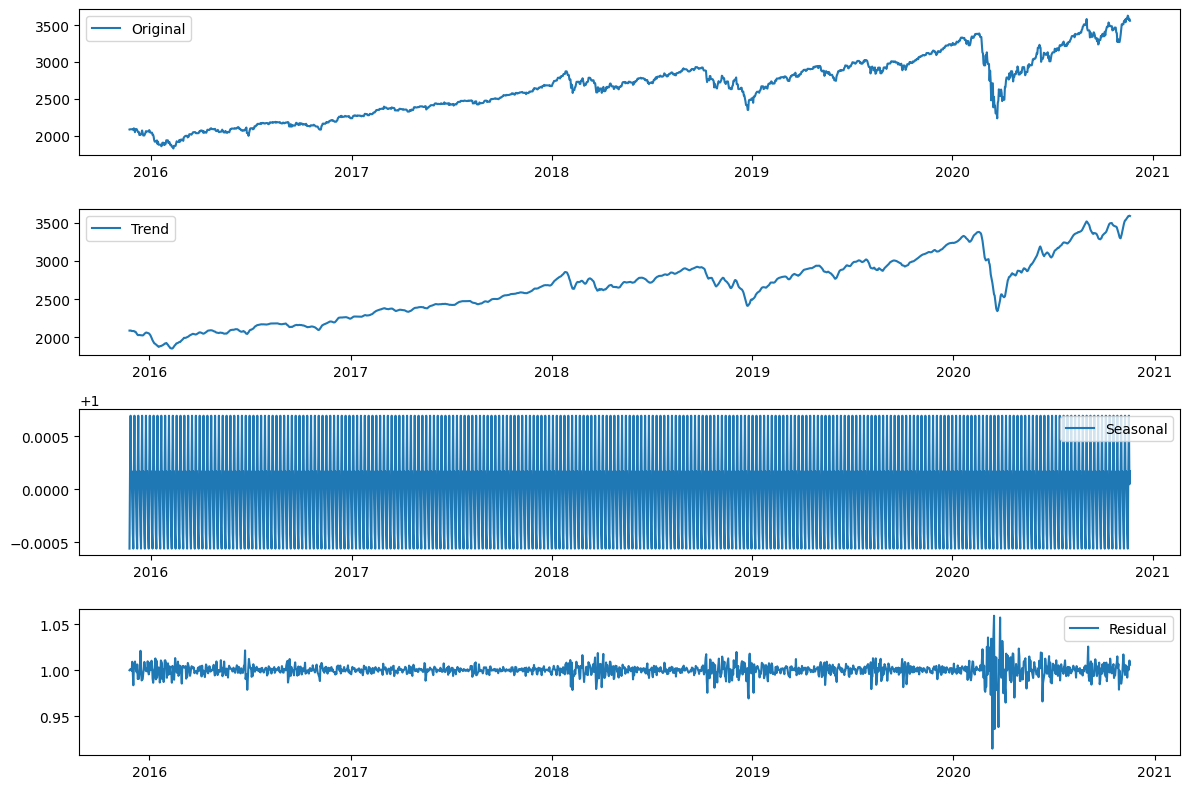

In [6]:
# Apply STL decomposition
stl_result = seasonal_decompose(df_stock['Adj Close'], model='multiplicative')

# Plot the original, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_stock['Adj Close'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(stl_result.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(stl_result.seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(stl_result.resid, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


# **2. Time Series Visualization** (10pts) (at least 4 plots)

## (i) Line Plot

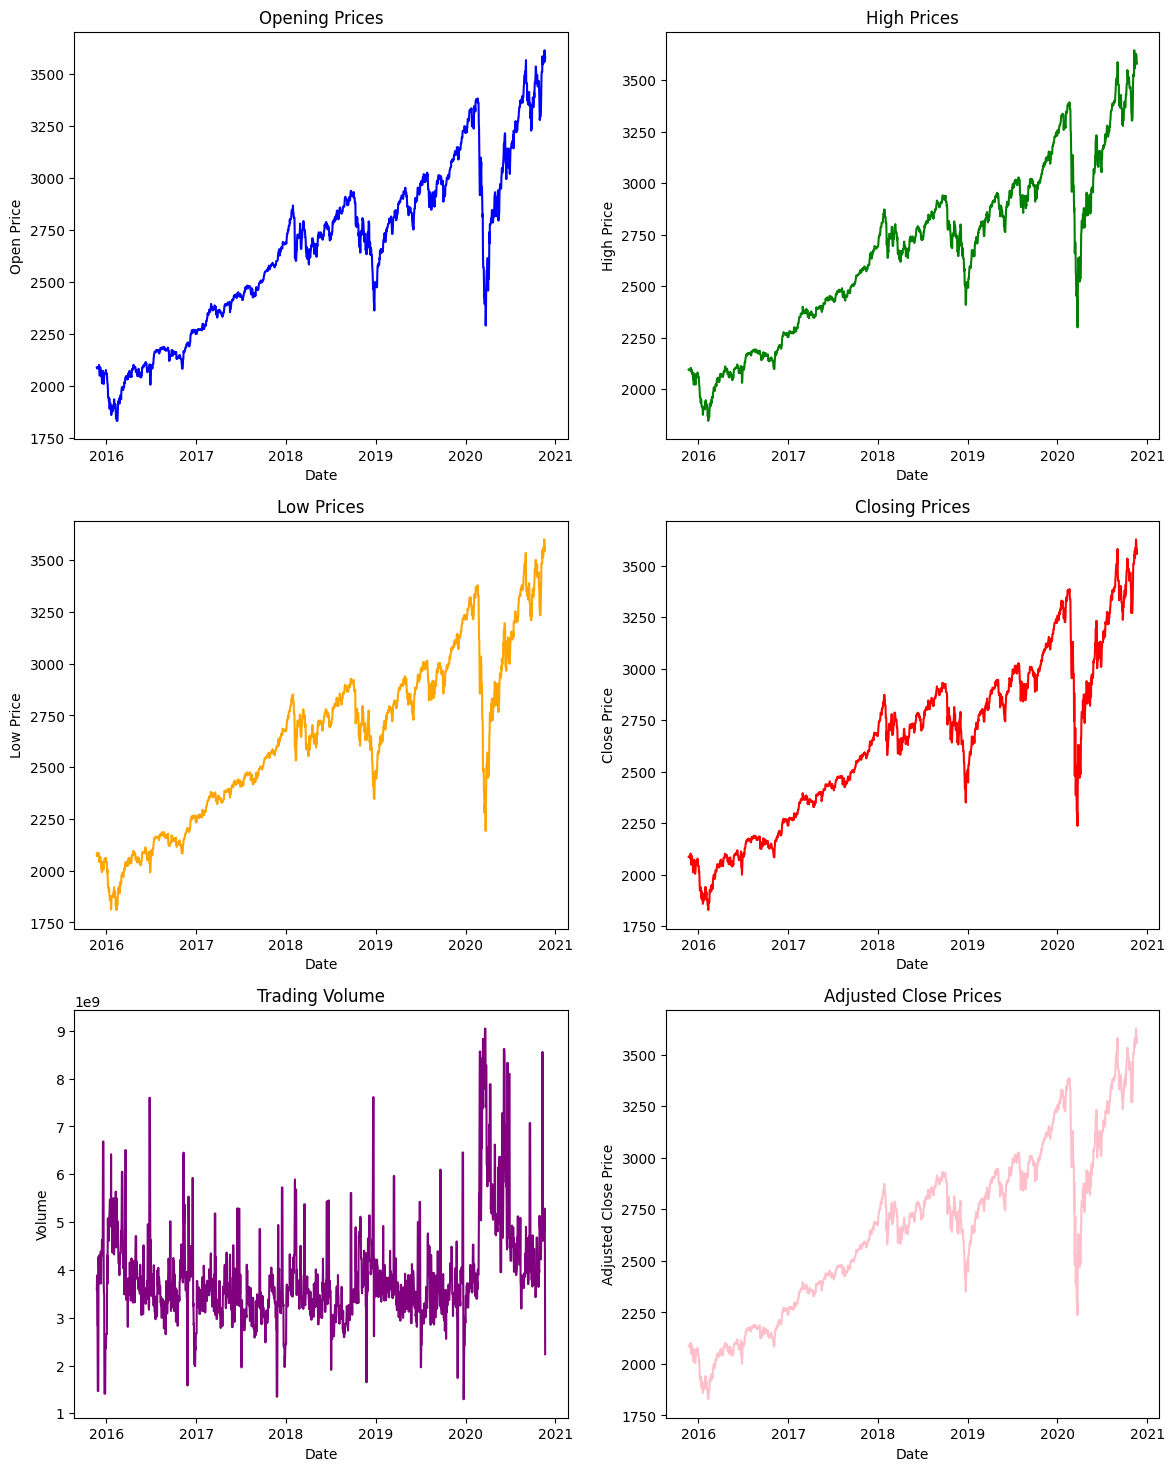

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

df_stock = pd.read_csv(file_path)
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock.set_index('Date', inplace=True)

plt.figure(figsize=(14, 18))

plt.subplot(3, 2, 1) # (rows, columns, panel number)
plt.plot(df_stock['Open'], color='blue', label='Open')
plt.title('Opening Prices')
plt.xlabel('Date')
plt.ylabel('Open Price')

plt.subplot(3, 2, 2)
plt.plot(df_stock['High'], color='green', label='High')
plt.title('High Prices')
plt.xlabel('Date')
plt.ylabel('High Price')

plt.subplot(3, 2, 3)
plt.plot(df_stock['Low'], color='orange', label='Low')
plt.title('Low Prices')
plt.xlabel('Date')
plt.ylabel('Low Price')

plt.subplot(3, 2, 4)
plt.plot(df_stock['Close'], color='red', label='Close')
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.subplot(3, 2, 5)
plt.plot(df_stock['Volume'], color='purple', label='Volume')
plt.title('Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.subplot(3, 2, 6)
plt.plot(df_stock['Adj Close'], color='pink', label='Adj Close')
plt.title('Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## (ii) Histogram

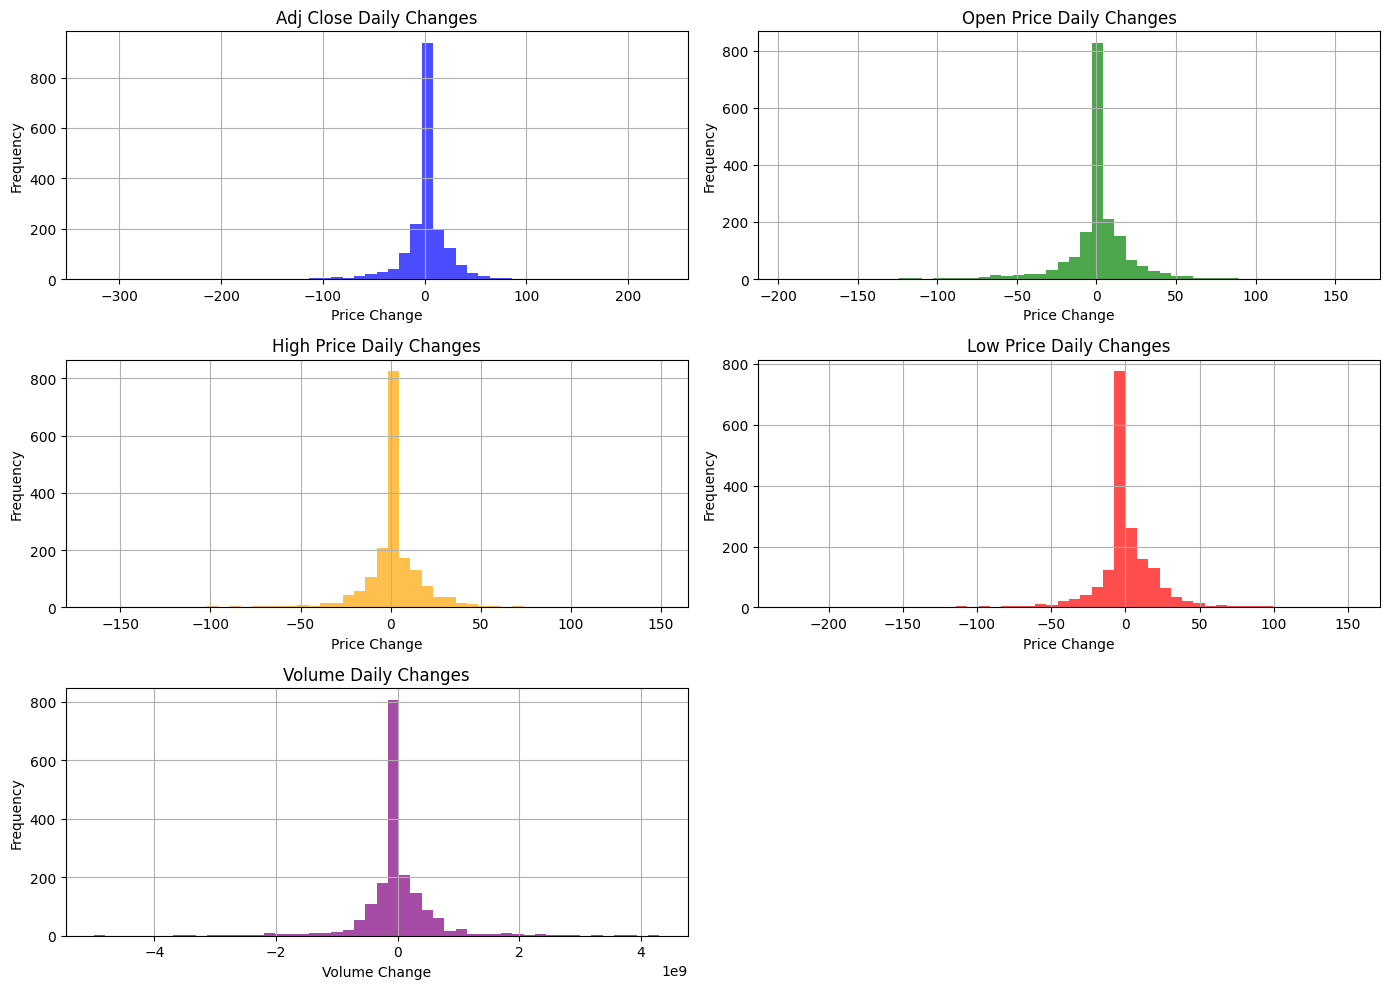

In [10]:
daily_changes_close = df_stock['Adj Close'].diff().dropna()
daily_changes_open = df_stock['Open'].diff().dropna()
daily_changes_high = df_stock['High'].diff().dropna()
daily_changes_low = df_stock['Low'].diff().dropna()
daily_changes_volume = df_stock['Volume'].diff().dropna()


plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
daily_changes_close.hist(bins=50, color='blue', alpha=0.7)
plt.title('Adj Close Daily Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
daily_changes_open.hist(bins=50, color='green', alpha=0.7)
plt.title('Open Price Daily Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
daily_changes_high.hist(bins=50, color='orange', alpha=0.7)
plt.title('High Price Daily Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
daily_changes_low.hist(bins=50, color='red', alpha=0.7)
plt.title('Low Price Daily Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')

plt.subplot(3, 2, 5)
daily_changes_volume.hist(bins=50, color='purple', alpha=0.7)
plt.title('Volume Daily Changes')
plt.xlabel('Volume Change')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## (iii) Box Plot

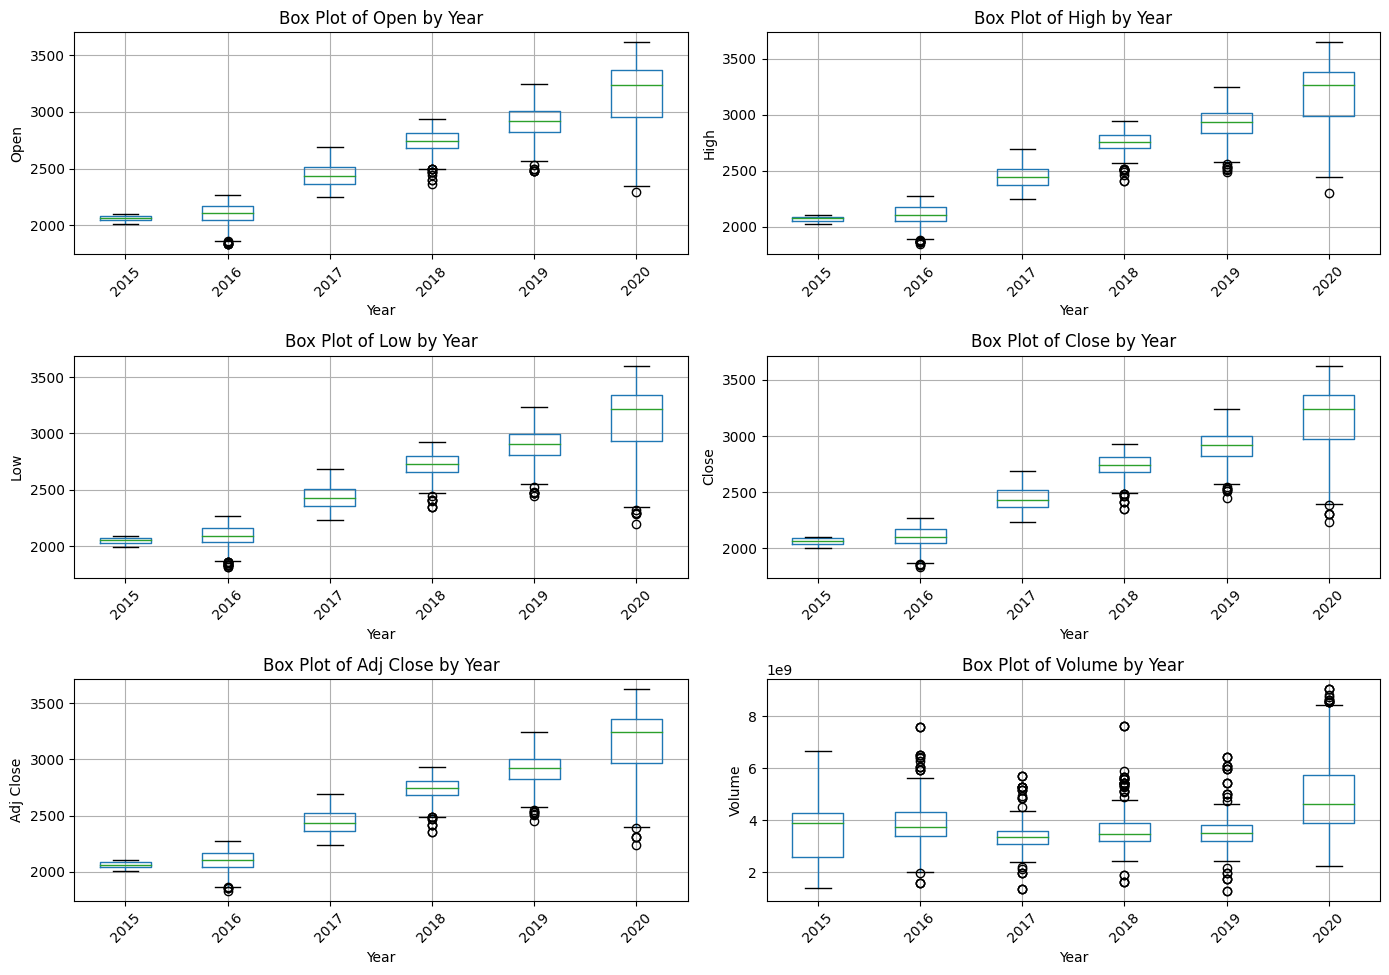

In [11]:
df_stock.index = pd.to_datetime(df_stock.index)
df_stock['Year'] = df_stock.index.year

plt.figure(figsize=(14, 10))

columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    df_stock.boxplot(column=[column], by='Year', ax=plt.gca())
    plt.title(f'Box Plot of {column} by Year')
    plt.suptitle('')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## (iv) Autocorrelation Function Plot

<Figure size 1200x600 with 0 Axes>

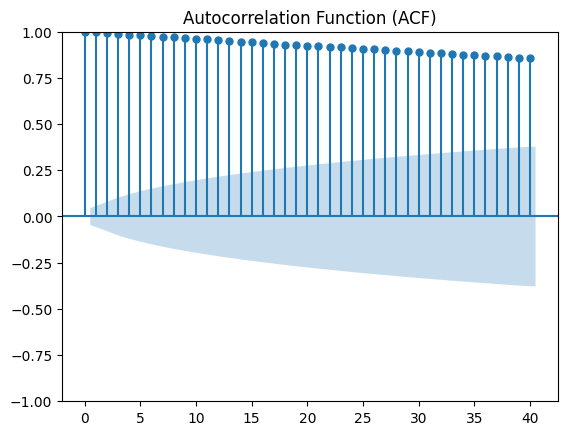

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(df_stock['Adj Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()


## (v) Partial Autocorrelation Function Plot

<Figure size 1200x600 with 0 Axes>

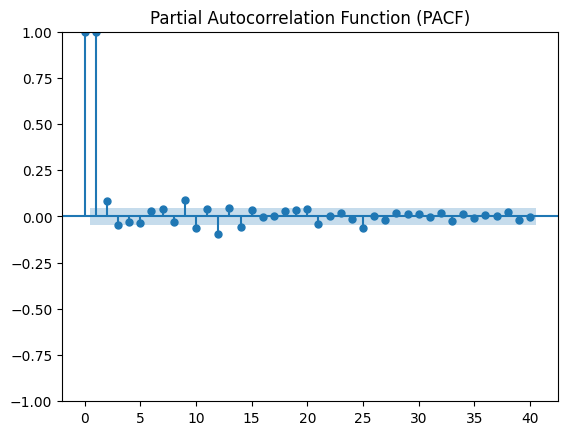

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12, 6))
plot_pacf(df_stock['Adj Close'], lags=40, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


# **3. Description of Time series** (is it stationary, are there any trends, seasonality etc) (10pts)

### Test for stationarity

We can't reject the null hypothesis, the series appeart to be not stationary

In [14]:
# statistical test
result = adfuller(df_stock['Adj Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.870397
p-value: 0.797565
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


The results of the ADF test indicate that the Yahoo stock price series is not stationary. The high p-value and the ADF statistic being higher than any of the critical values suggest the presence of a unit root in the series. This means that the stock price series exhibits time-dependent structures and does not revert around a constant mean or does not have a constant variance over time.
In financial time series like stock prices, non-stationarity is expected due to various factors like economic changes, company performance, and market sentiment, which can cause trends and volatility in stock prices. The series not being stationary implies that the mean, variance, and covariance of the series change over time.

## Further Analysis for Trends and Seasonality (as we can see in **Time Series Decomposition** above)

The decomposition of time series reveals a clear upward trend, signifying consistent growth over the period analyzed, likely reflecting the company's positive performance and favorable market conditions. Seasonality patterns subtle cyclical fluctuations on a yearly and monthly basis, which could be associated with recurring business or market events. The decomposition graphs highlight these trends and seasonalities, with the residuals indicating the expected volatility in the stock market, driven by factors beyond regular cyclical influences. This analysis provides valuable insights into the stock's historical behavior, which can be a useful reference for predicting future trends and identifying optimal investment timings.

# 4. Yahoo Stock Models

# Grid Search for Hyperparameters for ARIMA model

In [15]:
import pandas as pd
from pmdarima import auto_arima


# Calculate the ROI (Return on Investment) using percent change
df_stock['ROI'] = df_stock['Adj Close'].pct_change()

# Drop the first row since the percent change for the first row will be NaN
df_stock.dropna(inplace=True)

# Fit an AutoARIMA model on the ROI
autoarima_model_roi = auto_arima(df_stock['ROI'], seasonal=True, m=12)

# Print the summary of the model
print(autoarima_model_roi.summary())


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1824
Model:             SARIMAX(2, 0, 1)x(2, 0, [], 12)   Log Likelihood                5830.946
Date:                             Wed, 03 Apr 2024   AIC                         -11647.891
Time:                                     01:17:21   BIC                         -11609.330
Sample:                                 11-24-2015   HQIC                        -11633.666
                                      - 11-20-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      1.362      0.173   -9.24e-05       0.001
ar.L1          0.2333      

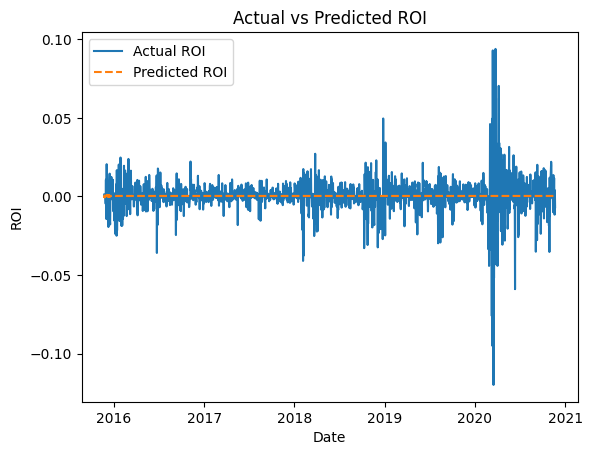

In [16]:
import matplotlib.pyplot as plt

# Generate predictions using the fitted model
predictions = autoarima_model_roi.predict(n_periods=len(df_stock))

# Plot actual ROI values
plt.plot(df_stock.index, df_stock['ROI'], label='Actual ROI')

# Plot predicted ROI values
plt.plot(df_stock.index, predictions, label='Predicted ROI', linestyle='--')

plt.xlabel('Date')
plt.ylabel('ROI')
plt.title('Actual vs Predicted ROI')
plt.legend()
plt.show()



In [17]:
from sklearn.metrics import r2_score
# Calculate R-squared score
r2 = r2_score(df_stock['ROI'], predictions)
print("R-squared score:", r2)

R-squared score: -0.00018061194122953594


The graph comparing Actual ROI to Predicted ROI and the corresponding negative R-squared score suggest that the current ARIMA model **does not** provide an accurate prediction for the stock's ROI. The predicted values do not capture the variability of the actual data, and the negative R-squared score indicates that the model is worse than a naive, baseline model that would predict the mean ROI for all observations.

# ARIMA Model with Additinal Features

In [ ]:
import pandas as pd


df_stock = pd.read_csv(file_path)
# Convert the date column to datetime type
df_stock['Date'] = pd.to_datetime(df_stock['Date'])



# Extract Date Features
df_stock['Year'] = df_stock['Date'].dt.year
df_stock['Month'] = df_stock['Date'].dt.month
df_stock['Day'] = df_stock['Date'].dt.day
df_stock['DayOfWeek'] = df_stock['Date'].dt.dayofweek
df_stock['Quarter'] = df_stock['Date'].dt.quarter

# Calculate Price Differences
df_stock['High_Low_Diff'] = df_stock['High'] - df_stock['Low']
df_stock['Open_Close_Diff'] = df_stock['Open'] - df_stock['Close']

# Calculate Price Ratios
df_stock['Close_Open_Ratio'] = df_stock['Close'] / df_stock['Open']

# Display the updated DataFrame with new features
print(df_stock.head())


        Date         High          Low         Open        Close  \
0 2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1 2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2 2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3 2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4 2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   

         Volume    Adj Close  Year  Month  Day  DayOfWeek  Quarter  \
0  3.587980e+09  2086.590088  2015     11   23          0        4   
1  3.884930e+09  2089.139893  2015     11   24          1        4   
2  2.852940e+09  2088.870117  2015     11   25          2        4   
3  2.852940e+09  2088.870117  2015     11   26          3        4   
4  1.466840e+09  2090.110107  2015     11   27          4        4   

   High_Low_Diff  Open_Close_Diff  Close_Open_Ratio  
0      14.220215         2.819824          0.998650  
1      23.830078        -4.719971          1.002264  
2       

In [ ]:
import pandas as pd
from pmdarima import auto_arima



# Fit an AutoARIMA model on the Close prices
autoarima_model_close = auto_arima(df_stock['Adj Close'], seasonal=True, m=12)

# Print the summary of the Close price model
print("Close Price Model Summary:")
print(autoarima_model_close.summary())

# Select the relevant features and target variable (Close prices)
features = df_stock[['Year', 'Month', 'Day', 'DayOfWeek', 'Quarter',
                     'High_Low_Diff', 'Open_Close_Diff', 'Close_Open_Ratio']]
target = df_stock['Adj Close']

# Fit an AutoARIMA model on the target variable (Close prices) with additional features
autoarima_model_with_features = auto_arima(target, exogenous=features, seasonal=True, m=12)

# Print the summary of the model with additional features
print("\nModel Summary with Additional Features:")
print(autoarima_model_with_features.summary())


Close Price Model Summary:
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1825
Model:             SARIMAX(3, 1, 2)x(2, 0, [], 12)   Log Likelihood               -8571.167
Date:                             Mon, 01 Apr 2024   AIC                          17160.334
Time:                                     04:52:37   BIC                          17209.914
Sample:                                          0   HQIC                         17178.624
                                            - 1825                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3813      0.311      1.225      0.220      -0.229       0.991


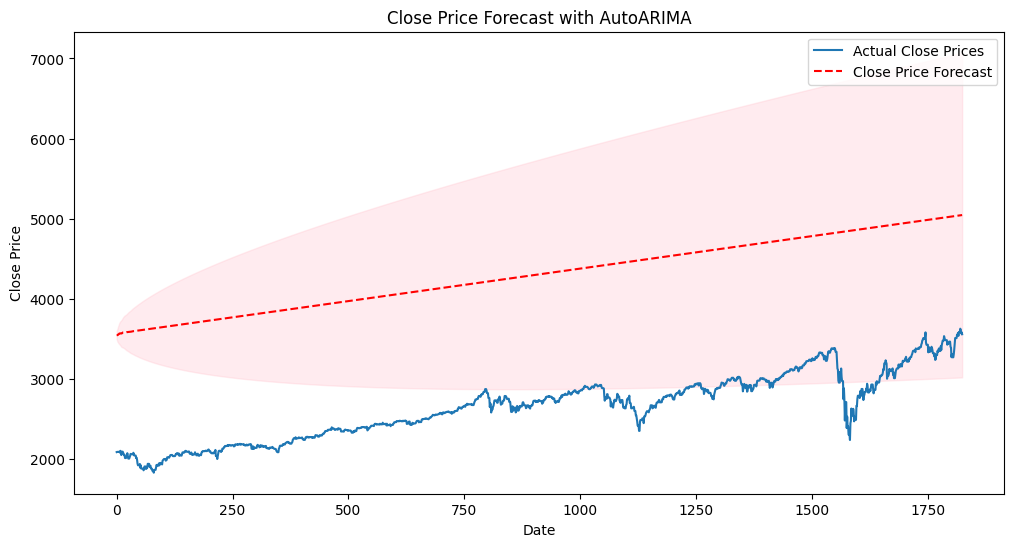

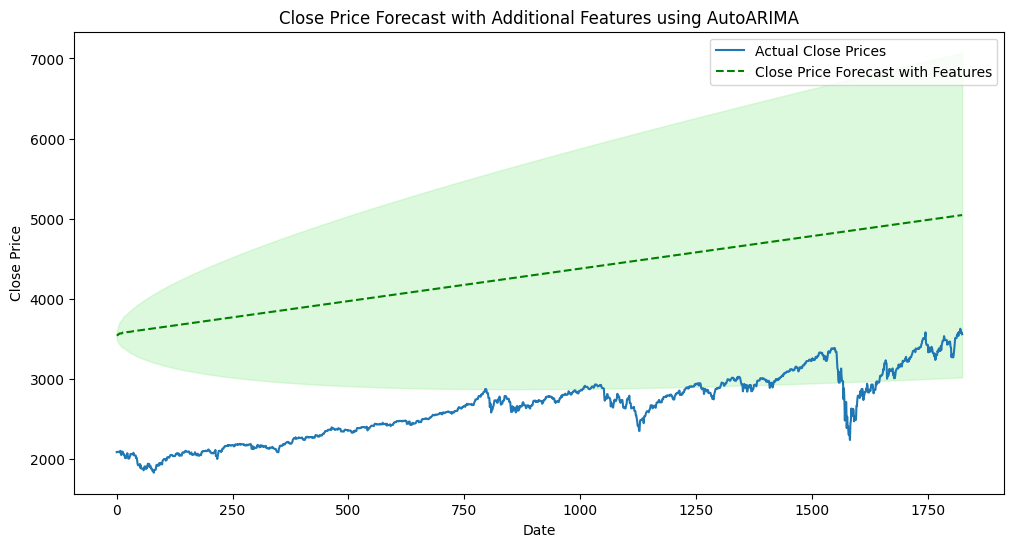

In [ ]:
import matplotlib.pyplot as plt

# Generate forecasts for the Close price model
close_forecast, conf_int = autoarima_model_close.predict(n_periods=len(df_stock), return_conf_int=True)

# Plot Close prices and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_stock.index, df_stock['Adj Close'], label='Actual Close Prices')
plt.plot(df_stock.index, close_forecast, color='red', linestyle='--', label='Close Price Forecast')
plt.fill_between(df_stock.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Close Price Forecast with AutoARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Generate forecasts for the model with additional features
forecast_with_features, conf_int_with_features = autoarima_model_with_features.predict(n_periods=len(df_stock),
                                                                                       exogenous=features,
                                                                                       return_conf_int=True)

# Plot Close prices and forecasts with additional features
plt.figure(figsize=(12, 6))
plt.plot(df_stock.index, df_stock['Adj Close'], label='Actual Close Prices')
plt.plot(df_stock.index, forecast_with_features, color='green', linestyle='--', label='Close Price Forecast with Features')
plt.fill_between(df_stock.index, conf_int_with_features[:, 0], conf_int_with_features[:, 1], color='lightgreen', alpha=0.3)
plt.title('Close Price Forecast with Additional Features using AutoARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared for the Close price model
r2_close = r2_score(df_stock['Close'], close_forecast)

# Calculate R-squared for the model with additional features
r2_with_features = r2_score(df_stock['Close'], forecast_with_features)

print("R-squared for Close Price Model:", r2_close)
print("R-squared for Model with Additional Features:", r2_with_features)


R-squared for Close Price Model: -15.705943943783339
R-squared for Model with Additional Features: -15.705943943783339


The visualization and R-squared values for both the ARIMA model with and without additional features indicate poor predictive performance, as evidenced by the forecasts significantly diverging from the actual close prices and the highly negative R-squared scores. The similarity in R-squared values suggests that the additional features have not improved the model's ability to forecast closing prices. In both cases, the model is not capturing the underlying patterns effectively and is worse than a naive baseline model.It would be prudent to consider alternative modeling approaches.

# Lasso Regression

Mean Squared Error: 0.0001697307653766519
Coefficients: [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.08448175e-07
 -1.09413948e-12  1.14474544e-07  0.00000000e+00]
Intercept: 0.0036282869653863838


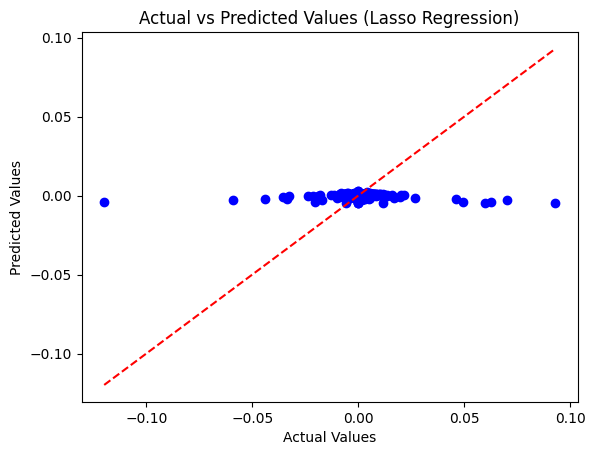

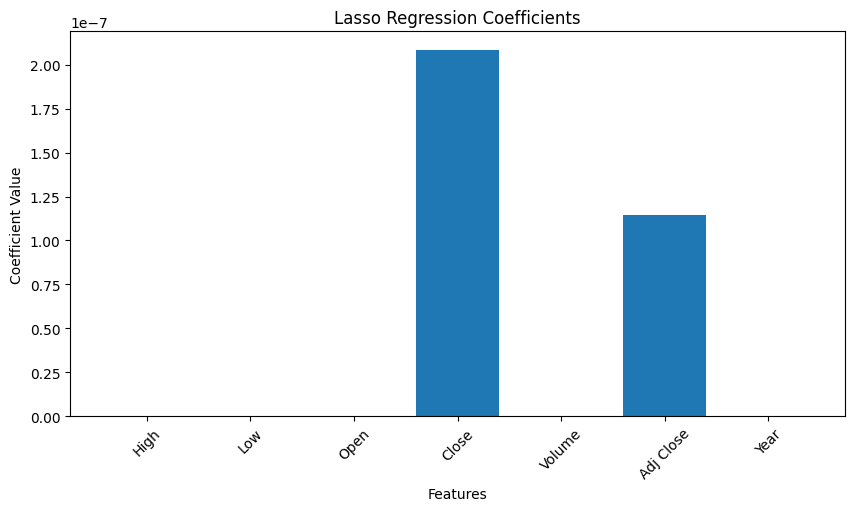

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Assuming 'ROI' is the target variable and other columns are features
X = df_stock.drop(columns=['ROI'])  # Features (independent variables)
y = df_stock['ROI']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # Set the regularization strength (alpha)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print coefficients
print("Coefficients:", lasso_model.coef_)

# Print intercept
print("Intercept:", lasso_model.intercept_)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Lasso Regression)')
plt.show()

# Plot coefficients
plt.figure(figsize=(10, 5))
plt.bar(range(len(lasso_model.coef_)), lasso_model.coef_)
plt.xticks(range(len(lasso_model.coef_)), X.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.025738186300378052


# Grid Search for Hyperparameters for SARIMA Model

In [19]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming df_stock['Adj Close'] contains your time series data
# Calculate the ROI (Return on Investment) using percent change
df_stock['ROI'] = df_stock['Adj Close'].pct_change()

# Drop the first row since the percent change for the first row will be NaN
df_stock.dropna(inplace=True)

# Define SARIMA parameters
p = 2  # AR order
d = 1  # I order
q = 2  # MA order
P = 1  # Seasonal AR order
D = 1  # Seasonal I order
Q = 1  # Seasonal MA order
m = 12  # Seasonal period

# Fit SARIMA model
sarima_model = SARIMAX(df_stock['ROI'], order=(p, d, q), seasonal_order=(P, D, Q, m))
sarima_result = sarima_model.fit()

# Print model summary
print(sarima_result.summary())

# Generate predictions
sarima_predictions = sarima_result.predict(start=0, end=len(df_stock)-1)

# Evaluate model performance (optional)
mse = ((df_stock['ROI'] - sarima_predictions) ** 2).mean()
print("Mean Squared Error:", mse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

                                      SARIMAX Results                                       
Dep. Variable:                                  ROI   No. Observations:                 1822
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                5729.955
Date:                              Wed, 03 Apr 2024   AIC                         -11445.910
Time:                                      01:19:21   BIC                         -11407.407
Sample:                                  11-26-2015   HQIC                        -11431.701
                                       - 11-20-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1255      0.049    -23.154      0.000      -1.221      -1.030
ar.L2         -0.20

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(subset_validation_data['BoxCox_Return'], predictions)
print("R-squared:", r_squared)


R-squared: -0.321485117227869


# LSTM Model with Hyper Parameters Search

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



target_col = 'ROI'
features = df_stock.drop(columns=[target_col])
target = df_stock[target_col]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Prepare data for LSTM model
def create_dataset(X, y, time_steps=1):
    X_data, y_data = [], []
    for i in range(len(X) - time_steps):
        X_data.append(X[i:(i + time_steps)])
        y_data.append(y[i + time_steps])
    return np.array(X_data), np.array(y_data)

time_steps = 10  # Number of time steps (input sequence length)
X_lstm, y_lstm = create_dataset(scaled_features, scaled_target, time_steps)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X_lstm))
X_train, X_test = X_lstm[:split_index], X_lstm[split_index:]
y_train, y_test = y_lstm[:split_index], y_lstm[split_index:]

# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error:", mse)

# Make predictions
y_pred = model.predict(X_test)

# Rescale the predictions and actual values
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Calculate R-squared
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
print("R-squared:", r2)


Epoch 1/100
46/46 [==============================] - 9s 18ms/step - loss: 0.0395
Epoch 2/100
46/46 [==============================] - 1s 18ms/step - loss: 0.0029
Epoch 3/100
46/46 [==============================] - 1s 24ms/step - loss: 0.0019
Epoch 4/100
46/46 [==============================] - 1s 21ms/step - loss: 0.0016
Epoch 5/100
46/46 [==============================] - 1s 21ms/step - loss: 0.0014
Epoch 6/100
46/46 [==============================] - 1s 21ms/step - loss: 0.0013
Epoch 7/100
46/46 [==============================] - 1s 20ms/step - loss: 0.0012
Epoch 8/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 9/100
46/46 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 10/100
46/46 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 11/100
46/46 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 12/100
46/46 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 13/100
46/46 [=====

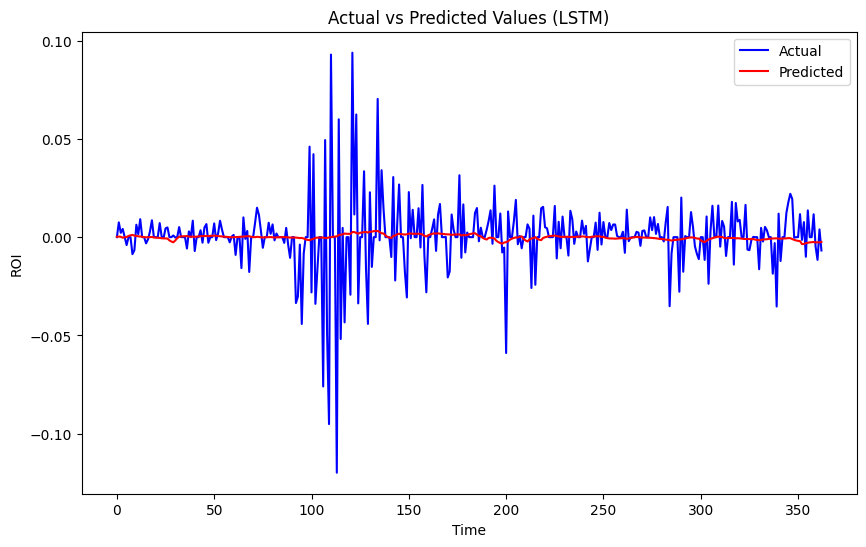

In [ ]:


# Rescale the predictions and actual values
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual', color='blue')
plt.plot(y_pred_rescaled, label='Predicted', color='red')
plt.title('Actual vs Predicted Values (LSTM)')
plt.xlabel('Time')
plt.ylabel('ROI')
plt.legend()
plt.show()


# Random Forest with Hyper paremeters search Model

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# Assuming 'ROI' is the target variable and other columns are features
X = df_stock.drop(columns=['ROI'])  # Features (independent variables)
y = df_stock['ROI']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.0001509308171813292
R-squared: 0.08787601158306624


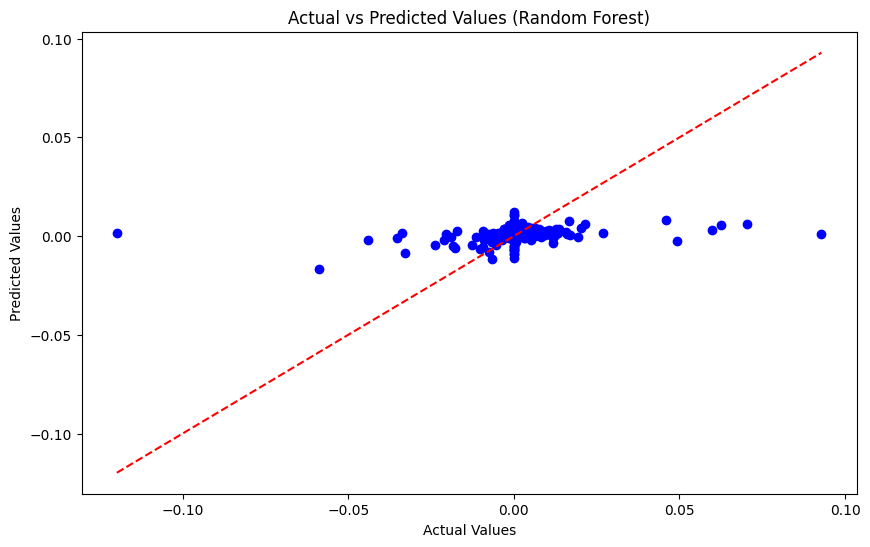

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# **5. Predictions** (make some predictions and plot them). (10pts)

In [20]:
# Generate predictions for one month ahead
forecast_start = len(df_stock)  # Start from the last observed date
forecast_end = forecast_start + 30  # Forecast one month ahead (30 days)

sarima_forecast = sarima_result.predict(start=forecast_start, end=forecast_end)

# Print the forecasted values
print("Forecasted ROI for the next month:")
print(sarima_forecast)


Forecasted ROI for the next month:
2020-11-21    1.594940e-03
2020-11-22    3.748099e-04
2020-11-23   -2.236137e-03
2020-11-24    3.219811e-03
2020-11-25    1.079685e-03
2020-11-26   -1.070261e-04
2020-11-27   -1.671447e-03
2020-11-28    3.540582e-03
2020-11-29    1.201462e-03
2020-11-30    1.011366e-04
2020-12-01   -1.784821e-04
2020-12-02    4.247516e-03
2020-12-03   -7.491429e-07
2020-12-04    3.409586e-04
2020-12-05   -1.441040e-03
2020-12-06    2.249041e-03
2020-12-07    2.012667e-03
2020-12-08   -4.699008e-04
2020-12-09   -1.260656e-03
2020-12-10    3.579563e-03
2020-12-11    1.231026e-03
2020-12-12   -6.069918e-04
2020-12-13    2.101495e-04
2020-12-14    3.613519e-03
2020-12-15    2.411531e-04
2020-12-16    1.982220e-04
2020-12-17   -1.331376e-03
2020-12-18    2.175410e-03
2020-12-19    2.089197e-03
2020-12-20   -5.438361e-04
2020-12-21   -1.184684e-03
Freq: D, Name: predicted_mean, dtype: float64


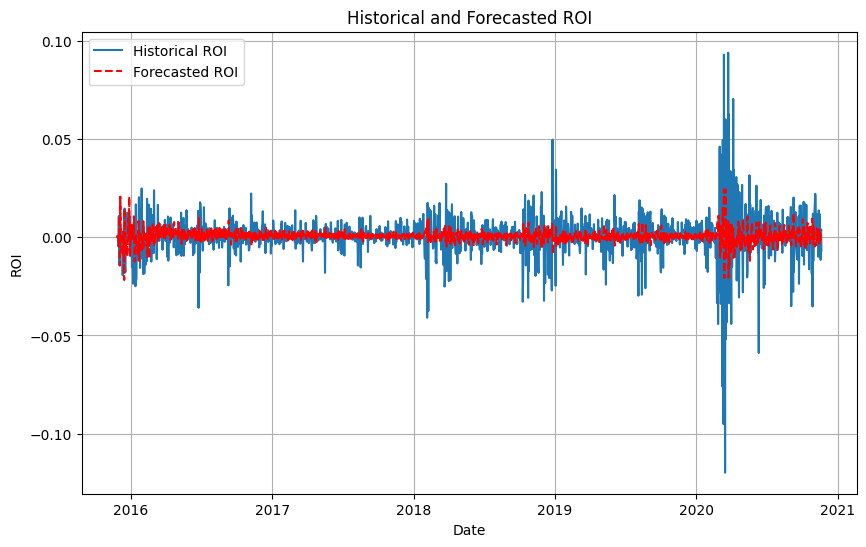

In [23]:

# Generate predictions for the entire dataset
sarima_forecast = sarima_result.predict(start=0, end=len(df_stock)-1)

# Plot the historical data
plt.figure(figsize=(10, 6))
plt.plot(df_stock.index, df_stock['ROI'], label='Historical ROI')

# Plot the forecasted values
plt.plot(df_stock.index, sarima_forecast, color='red', linestyle='--', label='Forecasted ROI')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('ROI')
plt.title('Historical and Forecasted ROI')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df_stock['ROI'], sarima_forecast)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df_stock['ROI'], sarima_forecast)
print("Mean Absolute Error (MAE):", mae)

#

Mean Squared Error (MSE): 0.0001044697491272247
Mean Absolute Error (MAE): 0.005642173946564183


Our group picked SARIMA model because of the best accuracy metrics and its seasonal transformation feature. Although the R-squared value is negative, suggesting a discrepancy between actual and predicted ROI, the model seems to follow the actual ROI closely over time, as seen in the plot.
However, the SARIMA model's performance might benefit from further optimization.

# **6. Team contributions.** For each team member, describe the contribution. (10pts)


**Marina** [2 hours] :- Time Series Decomposition, Time Series Visualization (Line Plot, Histogram), TS models (ARIMA regular & ARIMA with additional features), Predictions, Observations of all the visualizations and models

---
**Rishi** [2 hours] :- Time Series Decomposition, Time Series Visualization (Box Plot, Autocorrelation Function Plot), TS models (LSTM Model & AARIMA model), Predictions, Observations of all the visualizations and models

---
**Rohan** [2 hours] :- Time Series Decomposition, Time Series Visualization ( Partial Autocorrelation Function Plot), Description of Stationarity and trends, TS models (Random Forest & Lasso Regression), Predictions, Observations of all the visualizations and models


Note: Some parts were done by all of us together (i.e: Decomposition, Predictions, etc...)



